In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

# Regression example

## Step 1. Preparation of data

create an evenly spaced numbers to form a linear regression

In [8]:
x_data = np.linspace(0.0,10.0,1000000)

create noises to blur the line

In [11]:
noise = np.random.randn(len(x_data))

y = mx + b

b = 5

In [12]:
y_true = (0.5 * x_data) + 5 + noise

In [13]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [19]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [32]:
my_data = pd.concat([x_df,y_df],axis=1)

In [34]:
my_data.head()

,X Data,Y
0,0.00000,4.735408
1,0.00001,5.455758
2,0.00002,6.019079
3,0.00003,4.880396
4,0.00004,6.526950


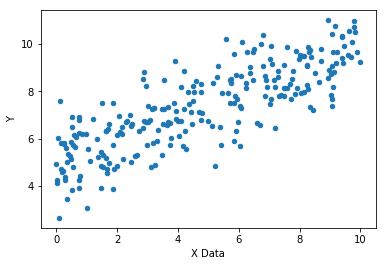

In [40]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

## Step 2. Begin of tensorflow learning

In [42]:
batch_size = 8

In [43]:
np.random.randn(2)

array([-1.11742624, -0.88452287])

In [41]:
m = tf.Variable(-1.117)

In [44]:
b = tf.Variable(-0.88)

In [45]:
xph = tf.placeholder(tf.float32,[batch_size])

In [48]:
yph = tf.placeholder(tf.float32,[batch_size])

prediction

In [47]:
y_model = m*xph+b

cost function

In [49]:
error = tf.reduce_sum(tf.square(yph-y_model))

optimizer

In [52]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [53]:
train = optimizer.minimize(error)

initialize variables

In [54]:
init = tf.global_variables_initializer()

run session

In [64]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        # random index - extract from 0-1000000 not include 1000000th
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
    
    # predicted model
    model_m,model_b = sess.run([m,b])

In [65]:
y_hat = x_data * model_m + model_b

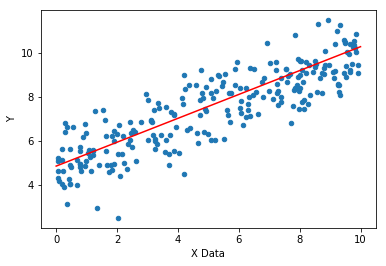

In [68]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

In [69]:
model_m

0.54227197

In [70]:
model_b

4.8461151